In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/crop-recommendation-dataset/Crop_Recommendation.csv


In [2]:
!pip install pyngrok

In [3]:
!ngrok config add-authtoken 2nOq5nNfLJKSRL7qzKSJ2D9ku5G_3U3didaK5HuAQvuK4akTt

Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml


In [4]:
!pip install dash

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.5/7.5 MB 50.7 MB/s eta 0:00:00


## **Data Reading**

In [5]:
df = pd.read_csv('/kaggle/input/crop-recommendation-dataset/Crop_Recommendation.csv')

In [6]:
# Sort Preview of data
df.head(10)

,Nitrogen,Phosphorus,Potassium,Temperature,Humidity,pH_Value,Rainfall,Crop
0,90,42,43,20.879744,82.002744,6.502985,202.935536,Rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,Rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,Rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,Rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,Rice
5,69,37,42,23.058049,83.370118,7.073454,251.055000,Rice
6,69,55,38,22.708838,82.639414,5.700806,271.324860,Rice
7,94,53,40,20.277744,82.894086,5.718627,241.974195,Rice
8,89,54,38,24.515881,83.535216,6.685346,230.446236,Rice
9,68,58,38,23.223974,83.033227,6.336254,221.209196,Rice


In [7]:
# info about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Nitrogen     2200 non-null   int64  
 1   Phosphorus   2200 non-null   int64  
 2   Potassium    2200 non-null   int64  
 3   Temperature  2200 non-null   float64
 4   Humidity     2200 non-null   float64
 5   pH_Value     2200 non-null   float64
 6   Rainfall     2200 non-null   float64
 7   Crop         2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [8]:
df.size , df.shape

(17600, (2200, 8))

In [9]:
# columns name 
df.columns

Index(['Nitrogen', 'Phosphorus', 'Potassium', 'Temperature', 'Humidity',
       'pH_Value', 'Rainfall', 'Crop'],
      dtype='object')

## Data Cleaning

In [10]:
# Checking null values
df.isnull().sum()

Nitrogen       0
Phosphorus     0
Potassium      0
Temperature    0
Humidity       0
pH_Value       0
Rainfall       0
Crop           0
dtype: int64

In [11]:
# Checking Nan Values
df.isna().sum()

Nitrogen       0
Phosphorus     0
Potassium      0
Temperature    0
Humidity       0
pH_Value       0
Rainfall       0
Crop           0
dtype: int64

In [12]:
# Columns Data Type
df.dtypes

Nitrogen         int64
Phosphorus       int64
Potassium        int64
Temperature    float64
Humidity       float64
pH_Value       float64
Rainfall       float64
Crop            object
dtype: object

## Basic Analysis

In [13]:
df.describe()

,Nitrogen,Phosphorus,Potassium,Temperature,Humidity,pH_Value,Rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


## Data Vizualization

In [14]:
# importing libraries for visualization
import plotly.express as px
import matplotlib.pyplot as plt

In [15]:
# Répartition des cultures
pie_fig = px.pie(df, names='Crop', title='Répartition des Cultures', color_discrete_sequence=px.colors.qualitative.Set3)
pie_fig.update_traces(textinfo='percent+label', pull=[0.05]*len(df['Crop'].unique()))  # Ajout des pourcentages et mise en relief
pie_fig.show()


In [16]:
# Scatter plot example (replace with appropriate visualization)
scatter_fig = px.scatter(df, x='Rainfall', y='Temperature', color='Crop', 
                         size='Nitrogen', hover_data=['Humidity', 'pH_Value'],
                         title='Pluviométrie vs Température avec concentration de Nitrogène',
                         color_discrete_sequence=px.colors.qualitative.Set3)
scatter_fig.show()


/opt/conda/lib/python3.10/site-packages/plotly/express/_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



In [17]:
# Box plots pour comparer Nitrogen, Phosphorus et Potassium ensemble
box_fig = px.box(df.melt(id_vars='Crop', value_vars=['Nitrogen', 'Phosphorus', 'Potassium']),
                 x='variable', y='value', color='Crop', 
                 title='Distribution des Nutriments (Azote, Phosphore, Potassium) par Culture',
                 labels={'variable': 'Nutriment', 'value': 'Valeur'},
                color_discrete_sequence=px.colors.qualitative.Set3)
box_fig.show()



/opt/conda/lib/python3.10/site-packages/plotly/express/_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



In [18]:
# 10. Bar Plot des Niveaux Moyens de Nutriments par Culture
mean_nutrients = df.groupby('Crop')[['Nitrogen', 'Phosphorus', 'Potassium']].mean().reset_index()

bar_nutrients_fig = px.bar(mean_nutrients.melt(id_vars='Crop', value_vars=['Nitrogen', 'Phosphorus', 'Potassium']),
                           x='Crop', y='value', color='variable', 
                           barmode='group', title='Niveaux Moyens de Nutriments par Culture',
                           labels={'variable': 'Nutriment', 'value': 'Niveau Moyen'},
                          color_discrete_sequence=px.colors.qualitative.Set3)
bar_nutrients_fig.update_traces(texttemplate='%{y:.2f}', textposition='outside')
bar_nutrients_fig.show()

/opt/conda/lib/python3.10/site-packages/plotly/express/_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



In [19]:
import plotly.figure_factory as ff
import numpy as np

# Calcul des corrélations
corr_matrix = df[['Nitrogen', 'Phosphorus', 'Potassium', 'Temperature', 'Humidity', 'pH_Value', 'Rainfall']].corr()

# Heatmap
heatmap_fig = ff.create_annotated_heatmap(z=np.array(corr_matrix), 
                                          x=corr_matrix.columns.tolist(), 
                                          y=corr_matrix.columns.tolist(), 
                                          colorscale='Viridis', 
                                          showscale=True)
heatmap_fig.update_layout(title_text='Carte de Chaleur des Corrélations entre Variables')
heatmap_fig.show()

In [20]:
# 13. Sunburst Chart des Niveaux de Nutriments par Culture
sunburst_fig = px.sunburst(df, path=['Crop'], values='Nitrogen',
                           color='Phosphorus', hover_data=['Potassium'],
                           title='Diagramme en Soleil des Niveaux de Nutriments par Culture',
                           color_continuous_scale='Blues')
sunburst_fig.show()

In [21]:
hist_fig = px.histogram(df, x='pH_Value', color='Crop', nbins=20, 
                        title='Répartition des Valeurs de pH par Culture', 
                        color_discrete_sequence=px.colors.qualitative.Pastel)
hist_fig.show()

/opt/conda/lib/python3.10/site-packages/plotly/express/_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



In [22]:
scatter_3d_fig = px.scatter_3d(df, x='Temperature', y='Humidity', z='Rainfall', color='Crop',
                               size='Nitrogen', title='Température, Humidité et Pluviométrie par Culture')
scatter_3d_fig.show()


/opt/conda/lib/python3.10/site-packages/plotly/express/_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



In [23]:
import dash
from dash import dcc, html
from dash.dependencies import Input, Output

app = dash.Dash(__name__)


# Define layout
app.layout = html.Div(children=[
    html.H1(children='Crop Dashboard'),
    html.Div(children='''Let s analyze Crop Distribution and Nutrients!'''),

    # Première rangée de graphiques côte à côte
    html.Div(children=[
        dcc.Graph(id='pie-chart', figure=pie_fig, style={'width': '48%', 'display': 'inline-block'}),
        dcc.Graph(id='scatter-plot', figure=scatter_fig, style={'width': '48%', 'display': 'inline-block'}),
    ]),
    dcc.Graph(id='box-plot', figure=box_fig),

    # Deuxième rangée de graphiques côte à côte
    html.Div(children=[
        dcc.Graph(id='bar-nutrients', figure=bar_nutrients_fig, style={'width': '48%', 'display': 'inline-block'}),
        dcc.Graph(id='sunburst', figure=sunburst_fig, style={'width': '48%', 'display': 'inline-block'}),
    ]),

    # Troisième rangée avec les autres graphiques
    html.Div(children=[
        dcc.Graph(id='hist_fig', figure=hist_fig, style={'width': '48%', 'display': 'inline-block'}),
        dcc.Graph(id='scatter-3d', figure=scatter_3d_fig, style={'width': '48%', 'display': 'inline-block'}),
    ]),
    
])

In [24]:
# Run the app inline (specific to Kaggle/Jupyter environment)
from flask import Flask
import os
from threading import Thread
from pyngrok import ngrok

public_url = ngrok.connect(8050)
print(f"App is running at: {public_url}")

def run_app():
    app.run_server(host='0.0.0.0', port=8050, debug=False)

# Start the Dash app in a thread to avoid blocking
thread = Thread(target=run_app)
thread.start()

# Create a proxy to access the app via Kaggle output
from IPython.display import IFrame
display(IFrame(src='http://localhost:8050', width='100%', height='600px'))

App is running at: NgrokTunnel: "https://9474-35-234-36-240.ngrok-free.app" -> "http://localhost:8050"


## Modeling to predict crop yield based on the quantity of nitrogen, phosphorus, potassium, temperature, humidity, and pH value.

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

X = df[['Nitrogen', 'Phosphorus', 'Potassium', 'Temperature', 'Humidity', 'pH_Value']]
y = df['Crop']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest classifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

#print(classification_report(y_test, y_pred))


Accuracy: 0.97


#### Plot the classification report

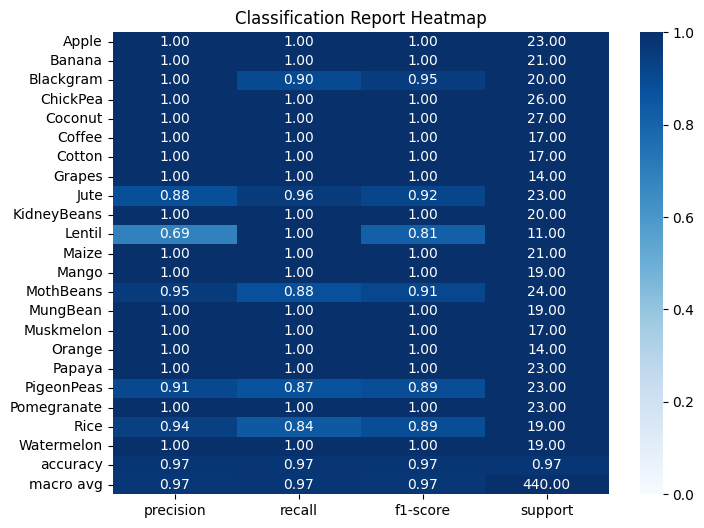

In [26]:
import seaborn as sns
report = classification_report(y_test, y_pred, output_dict=True)

df_report = pd.DataFrame(report).transpose()          # Convert to DataFrame

# Plot the classification report as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(df_report.iloc[:-1, :].astype(float), annot=True, cmap='Blues', fmt=".2f", vmin=0, vmax=1)
plt.title('Classification Report Heatmap')
plt.show()

## Crop Recommondation Based on Other Features

In [27]:
import ipywidgets as widgets
from IPython.display import display

def recommend_crop(nitrogen, phosphorus, potassium, temperature, humidity, ph_value):
    input_data = [[nitrogen, phosphorus, potassium, temperature, humidity, ph_value]]
    predicted_crop = model.predict(input_data)[0]
    return predicted_crop

# Create interactive widgets
nitrogen_slider = widgets.FloatSlider(min=0, max=100, step=1, description="Nitrogen (ppm)")
phosphorus_slider = widgets.FloatSlider(min=0, max=100, step=1, description="Phosphorus (ppm)")
potassium_slider = widgets.FloatSlider(min=0, max=100, step=1, description="Potassium (ppm)")
temperature_slider = widgets.FloatSlider(min=-10, max=50, step=0.5, description="Temperature (°C)")
humidity_slider = widgets.FloatSlider(min=0, max=100, step=1, description="Humidity (%)")
ph_value_slider = widgets.FloatSlider(min=0, max=14, step=0.1, description="pH Value")

# Output widget 
output = widgets.Output()

# Function to handle the button click event
def on_button_click(b):
    nitrogen = nitrogen_slider.value
    phosphorus = phosphorus_slider.value
    potassium = potassium_slider.value
    temperature = temperature_slider.value
    humidity = humidity_slider.value
    ph_value = ph_value_slider.value

    recommended_crop = recommend_crop(nitrogen, phosphorus, potassium, temperature, humidity, ph_value)
    
    with output:
        output.clear_output()  # Clear previous output before showing new one
        print(f"Based on the given features, the recommended crop is: {recommended_crop}")

predict_button = widgets.Button(description="Predict Crop")
predict_button.on_click(on_button_click)

# Display sliders, button, and output widget
display(nitrogen_slider, phosphorus_slider, potassium_slider, temperature_slider, humidity_slider, ph_value_slider, predict_button, output)


FloatSlider(value=0.0, description='Nitrogen (ppm)', step=1.0)

FloatSlider(value=0.0, description='Phosphorus (ppm)', step=1.0)

FloatSlider(value=0.0, description='Potassium (ppm)', step=1.0)

FloatSlider(value=0.0, description='Temperature (°C)', max=50.0, min=-10.0, step=0.5)

FloatSlider(value=0.0, description='Humidity (%)', step=1.0)

FloatSlider(value=0.0, description='pH Value', max=14.0)

Button(description='Predict Crop', style=ButtonStyle())

Output()